# Validation Plots

In [1]:
from aepybamm import (
    get_params,
    solve_from_expdata,
    compare,
)

c:\Users\EdmundDickinson\anaconda3\envs\env_external_pybamm_251\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


## Get parameters and model using BPX JSON file

In [2]:
parameter_values, model = get_params("params/example_lfp_BPX.json")

## Run simulations and compare to experiment

Solving with experimental data from 'data/LFP_025degC_Co20_Dch.csv'.
Solving with experimental data from 'data/LFP_025degC_1C_Dch.csv'.
Solving with experimental data from 'data/LFP_025degC_DC_WLTP.csv'.


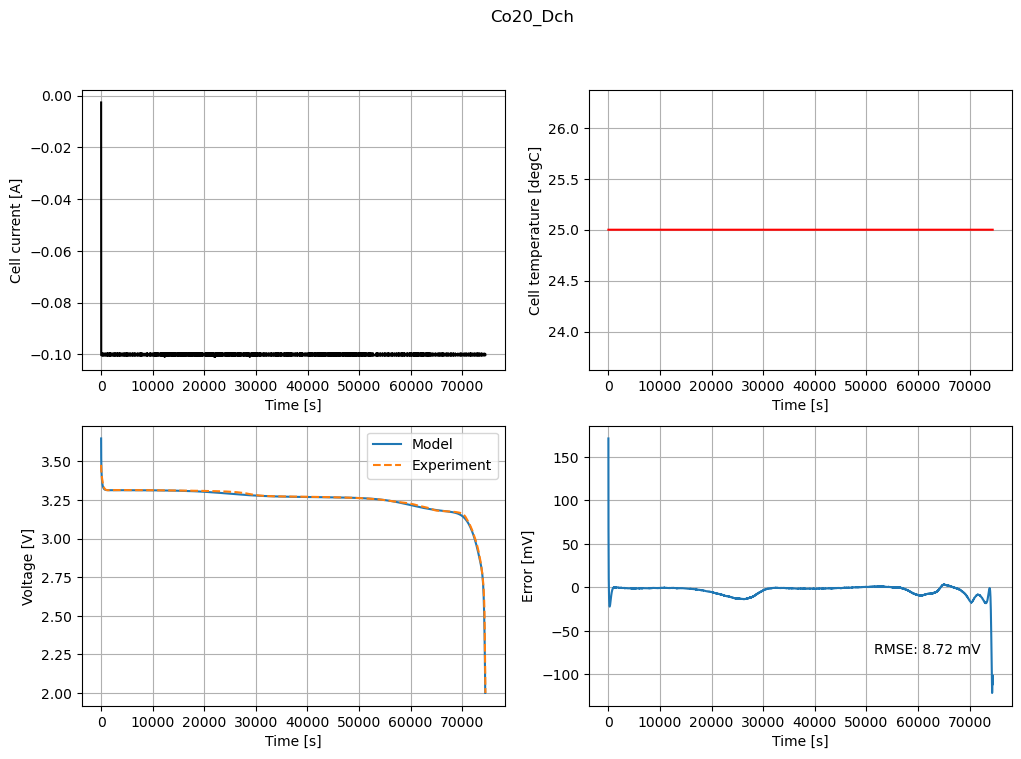

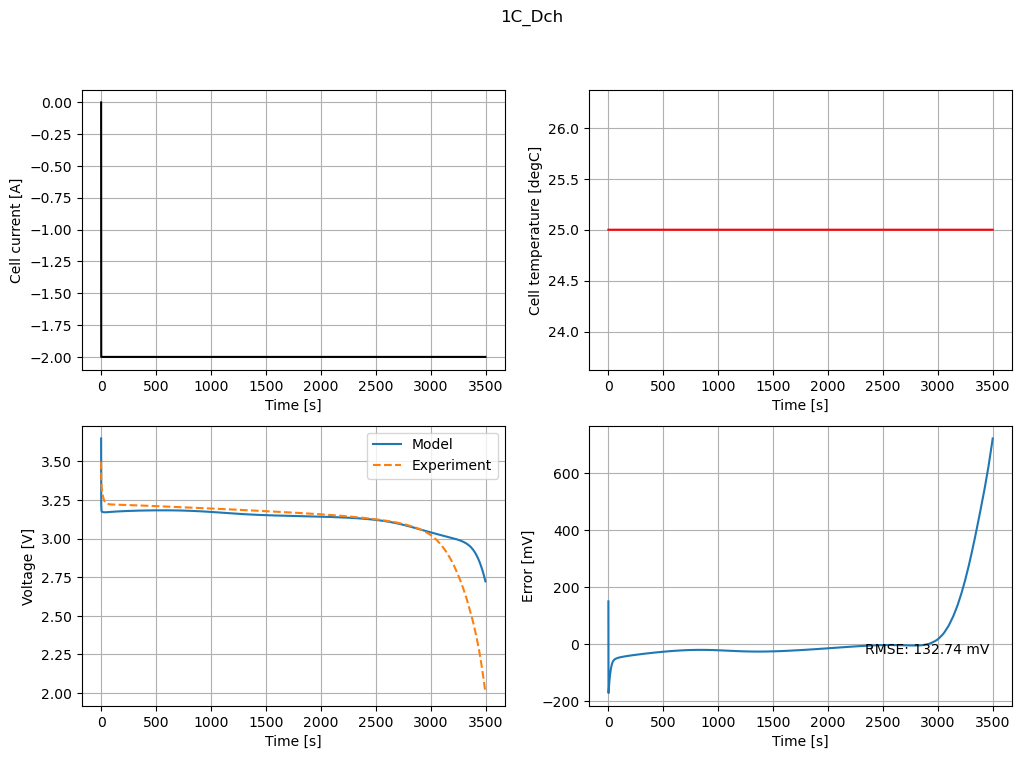

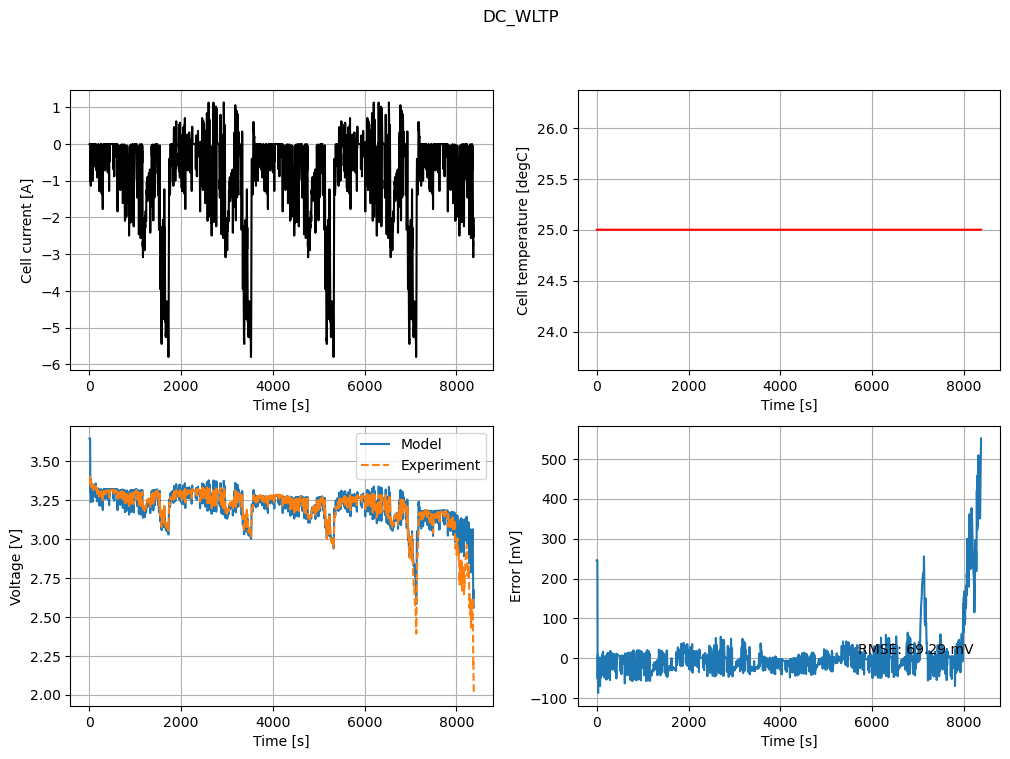

In [3]:
exps = [
    "Co20_Dch",
    "1C_Dch",
    "DC_WLTP"
]
DICT_COLS_STD = {
    "t": 0,
    "I": 1,
    "V": 2,
}

filestem = "data/LFP_025degC_"

sols = {}
for exp in exps:
    fp = f"{filestem}{exp}.csv"
    sols[exp] = solve_from_expdata(
        parameter_values,
        model,
        fp,
        dict_cols=DICT_COLS_STD,
        Tamb_degC=25,
    )

for exp, sol in sols.items():
    fp = f"{filestem}{exp}.csv"
    compare(
        sol,
        fp,
        dict_cols=DICT_COLS_STD,
        title=exp,
    )